### Entrenamiento de MLP

En este notebook, a partir del dataset creado en analisis-activaciones, de entrena un modelo MLP (60% de los datos) para predecir activaciones alineadas a partir de no alineadas.

Se utiliza conjunto de validación (20%) para medir la pérdida en entrenamiento.

Se utiliza conjunto de test (20%) para medir RMSE.

### Cargar librerías

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import random_split, DataLoader, TensorDataset

### Definir dispositivo (CPU/GPU)

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando device:", device)

Usando device: cuda


### Lectura de dataset y división en entrenamiento/validación/test 60/20/20

In [3]:
dataset = torch.load('./workspace/dataset_to_train_regressor_60_percent_neurons.pt', weights_only=False)
print(f"Dataset cargado con {len(dataset)} ejemplos.")

Dataset cargado con 110582 ejemplos.


In [4]:
from torch.utils.data import random_split

torch.manual_seed(2)
num_samples = len(dataset)
train_size = int(0.6 * num_samples)
val_size = int(0.2 * num_samples)
test_size = num_samples - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

batch_size = 512
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_dataset)}")


Train: 66349, Val: 22116, Test: 22117


### Definir modelo MLP

In [5]:
class SelectedNeuronsMLP(nn.Module):
    def __init__(self, n_neurons):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_neurons, n_neurons),
            nn.ReLU(),
            nn.Linear(n_neurons, n_neurons)
        )
    def forward(self, x):
        return self.net(x)

n_neurons = 2459  # número de selected_neurons
model = SelectedNeuronsMLP(n_neurons).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

### Entrenamiento con validación

In [6]:
num_epochs = 30

for epoch in range(num_epochs):
    # --- Entrenamiento ---
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x_batch.size(0)
    
    train_loss = total_loss / len(train_loader.dataset)
    
    # --- Validación ---
    model.eval()
    val_loss_total = 0
    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            y_pred_val = model(x_val)
            val_loss_total += loss_fn(y_pred_val, y_val).item() * x_val.size(0)
    
    val_loss = val_loss_total / len(val_loader.dataset)
    
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")

Epoch 1/30 | Train Loss: 1.163736 | Val Loss: 0.794505
Epoch 2/30 | Train Loss: 0.709244 | Val Loss: 0.670479
Epoch 3/30 | Train Loss: 0.617503 | Val Loss: 0.616243
Epoch 4/30 | Train Loss: 0.569022 | Val Loss: 0.589111
Epoch 5/30 | Train Loss: 0.539479 | Val Loss: 0.568628
Epoch 6/30 | Train Loss: 0.518652 | Val Loss: 0.554342
Epoch 7/30 | Train Loss: 0.505061 | Val Loss: 0.550069
Epoch 8/30 | Train Loss: 0.492992 | Val Loss: 0.542628
Epoch 9/30 | Train Loss: 0.485447 | Val Loss: 0.539411
Epoch 10/30 | Train Loss: 0.478817 | Val Loss: 0.534690
Epoch 11/30 | Train Loss: 0.472025 | Val Loss: 0.532211
Epoch 12/30 | Train Loss: 0.467454 | Val Loss: 0.528786
Epoch 13/30 | Train Loss: 0.463743 | Val Loss: 0.528780
Epoch 14/30 | Train Loss: 0.460847 | Val Loss: 0.527592
Epoch 15/30 | Train Loss: 0.457132 | Val Loss: 0.526227
Epoch 16/30 | Train Loss: 0.455065 | Val Loss: 0.525398
Epoch 17/30 | Train Loss: 0.453105 | Val Loss: 0.525043
Epoch 18/30 | Train Loss: 0.451032 | Val Loss: 0.522168
E

### Se detiene entrenamiento cuando el error de validación deja de decrecer

In [8]:
class SelectedNeuronsMLP(nn.Module):
    def __init__(self, n_neurons):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_neurons, n_neurons),
            nn.ReLU(),
            nn.Linear(n_neurons, n_neurons)
        )
    def forward(self, x):
        return self.net(x)

n_neurons = 2459  # número de selected_neurons
model = SelectedNeuronsMLP(n_neurons).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

num_epochs = 19

for epoch in range(num_epochs):
    # --- Entrenamiento ---
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x_batch.size(0)
    
    train_loss = total_loss / len(train_loader.dataset)
    
    # --- Validación ---
    model.eval()
    val_loss_total = 0
    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            y_pred_val = model(x_val)
            val_loss_total += loss_fn(y_pred_val, y_val).item() * x_val.size(0)
    
    val_loss = val_loss_total / len(val_loader.dataset)
    
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")

Epoch 1/19 | Train Loss: 1.158297 | Val Loss: 0.794296
Epoch 2/19 | Train Loss: 0.708111 | Val Loss: 0.669849
Epoch 3/19 | Train Loss: 0.617535 | Val Loss: 0.616522
Epoch 4/19 | Train Loss: 0.570538 | Val Loss: 0.587546
Epoch 5/19 | Train Loss: 0.540242 | Val Loss: 0.568850
Epoch 6/19 | Train Loss: 0.520438 | Val Loss: 0.558088
Epoch 7/19 | Train Loss: 0.506454 | Val Loss: 0.554551
Epoch 8/19 | Train Loss: 0.495644 | Val Loss: 0.542213
Epoch 9/19 | Train Loss: 0.486930 | Val Loss: 0.540429
Epoch 10/19 | Train Loss: 0.480722 | Val Loss: 0.536883
Epoch 11/19 | Train Loss: 0.474990 | Val Loss: 0.534505
Epoch 12/19 | Train Loss: 0.471084 | Val Loss: 0.532463
Epoch 13/19 | Train Loss: 0.466648 | Val Loss: 0.529884
Epoch 14/19 | Train Loss: 0.463483 | Val Loss: 0.528977
Epoch 15/19 | Train Loss: 0.460697 | Val Loss: 0.526385
Epoch 16/19 | Train Loss: 0.458488 | Val Loss: 0.529046
Epoch 17/19 | Train Loss: 0.455199 | Val Loss: 0.524814
Epoch 18/19 | Train Loss: 0.453870 | Val Loss: 0.525334
E

### Evaluación sobre conjunto de test

In [9]:
model.eval()
test_loss_total = 0
with torch.no_grad():
    for x_test, y_test in test_loader:
        x_test = x_test.to(device)
        y_test = y_test.to(device)
        y_pred_test = model(x_test)
        test_loss_total += loss_fn(y_pred_test, y_test).item() * x_test.size(0)

test_loss = test_loss_total / len(test_loader.dataset)
print(f"Test RMSE: {test_loss**0.5:.6f}")


Test RMSE: 0.722897


### Guardar modelo para inferencia

In [10]:
torch.save(model.state_dict(), "./workspace/models/mlp.pt")
print("Modelo guardado en ./workspace/models/mlp.pt")

Modelo guardado en ./workspace/models/mlp.pt


### Prueba sobre primer vector  del conjunto de test

In [20]:
# Predicción sobre el ejemplo del conjunto de test
x_test_tensor, y_test_tensor = test_dataset[23]  # cada uno tiene shape [n_neurons]
x_test_tensor = x_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

model.eval()
with torch.no_grad():
    y_pred = model(x_test_tensor.unsqueeze(0))  # agregar batch dim → [1, n_neurons]
    y_pred = y_pred.squeeze(0)                  # volver a [n_neurons]

In [21]:
import numpy as np
from sklearn.metrics import r2_score

def compute_metrics(Y_true, Y_pred):
    # RMSE "global" (aplanado) → lo que ya usabas
    rmse = np.sqrt(((Y_true - Y_pred) ** 2).mean())
    r2 = r2_score(Y_true, Y_pred, multioutput='variance_weighted')
    
    return {
        "RMSE": rmse,
        "R2": r2,
    }

compute_metrics(y_test_tensor.cpu().numpy(), y_pred.cpu().numpy())

{'RMSE': np.float32(0.29928103), 'R2': 0.9729611873626709}

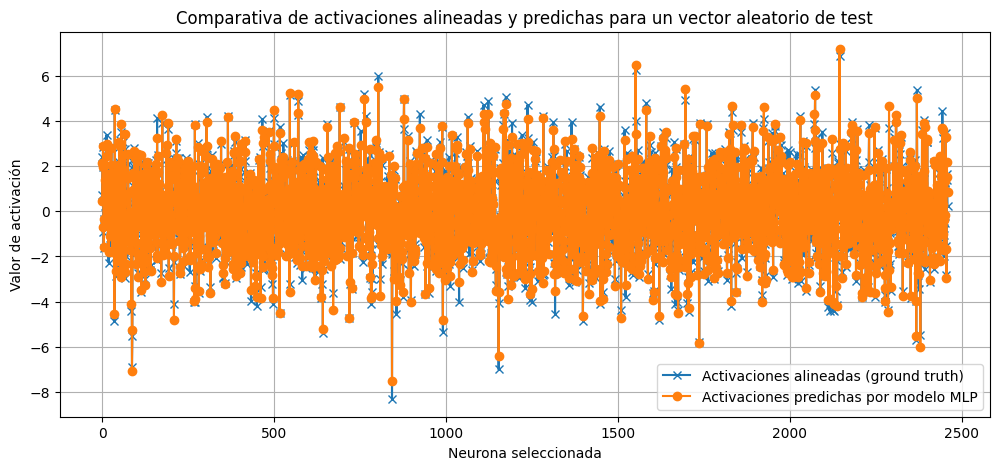

In [22]:
import matplotlib.pyplot as plt
x_faker, y_aligned = test_dataset[23] 
x_faker = x_faker.to(device)
y_aligned = y_aligned.to(device)

# Visualización
x_faker_np = x_faker.cpu().numpy()
y_aligned_np = y_aligned.cpu().numpy()
y_pred_np = y_pred.cpu().numpy()

plt.figure(figsize=(12,5))
# plt.plot(x_faker_np, label="Activaciones Modelo Falsamente Alineado", marker="s")
plt.plot(y_aligned_np, label="Activaciones alineadas (ground truth)", marker="x")
plt.plot(y_pred_np, label="Activaciones predichas por modelo MLP", marker="o")
plt.xlabel("Neurona seleccionada")
plt.ylabel("Valor de activación")
plt.title("Comparativa de activaciones alineadas y predichas para un vector aleatorio de test")
plt.legend()
plt.grid(True)
plt.show()